In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics 
from math import sqrt

In [2]:
df = pd.read_csv('features/91app_features.txt')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['memberid', 'online_ratio', 'total_day_using_percentage',
       'actually_using_percentage', 'view_per_date', 'view_per_session',
       'session_per_date', 'total_conversion_rate', 'off_cart_c', 'off_fav_c',
       'off_view_c', 'on_cart_c', 'on_fav_c', 'on_view_c', 'total_cart_c',
       'total_fav_c', 'total_view_c', 'viewtime_ave', 'view_time_med',
       '201803F', '201804F', '201805F', '201806F', '201807F', '201808F',
       '201809F', '201810F', '201811F', '201812F', '201901F', '201902F',
       '201903F', '201904F', '201803M', '201804M', '201805M', '201806M',
       '201807M', '201808M', '201809M', '201810M', '201811M', '201812M',
       '201901M', '201902M', '201903M', '201904M', '201803S', '201804S',
       '201805S', '201806S', '201807S', '201808S', '201809S', '201810S',
       '201811S', '201812S', '201901S', '201902S', '201903S', '201904S',
       'total_F', 'total_M', 'ave_M', 'ave_M_not_offline_return',
       'total_discount_percentage'],
      dtype='object')

In [4]:
df.shape[0]

76401

# inactive users are those whose total_day_using_percentage < 2%

In [5]:
df_inactive = df[df['total_day_using_percentage'] < 0.02]
df_active =   df[~(df['total_day_using_percentage'] < 0.02)]

In [6]:
df_inactive.shape[0], df_active.shape[0]

(25676, 50725)

# offline buyer are those who purchases only offline

In [7]:
df_never_buy = df_active[df_active['online_ratio'].isnull()]
df_buy = df_active[~df_active['online_ratio'].isnull()]

In [8]:
df_never_buy.shape, df_buy.shape

((14429, 66), (36296, 66))

In [9]:
def split_by_percentile(df, keyword, n):
    a_list = df[keyword].tolist()
    null_df = df[df[keyword].isnull()]
    remaining_df = df[~df[keyword].isnull()]
    return_list = []
    number_list = []
    for i in range(1, n):
        number = np.nanpercentile(a_list, int(100/n*i) )
        number_list.append(number)
        a_df = remaining_df[ remaining_df[keyword] <= number]
        remaining_df = remaining_df[~ (remaining_df[keyword] <= number)]      
        return_list.append(a_df)
    return_list.append(remaining_df)
    return return_list, number_list, null_df

In [10]:
[df1 , df2], number_list, null_df = split_by_percentile(df_buy, 'online_ratio', 2)

In [11]:
df1.shape[0] , df2.shape[0], number_list, null_df.shape[0]

(21087, 15209, [0.0], 0)

In [12]:
def difference_in_rate(df1, df2, key_word):
    
    newdf1, newdf2 = df1[~df1[key_word].isnull()],  df2[~df2[key_word].isnull()]
    n1, n2 = newdf1.shape[0] , newdf2.shape[0]
    if n1 == 0 or n2 == 0:
        return (0,0)
    
    m1, m2 = np.nanmean( newdf1[key_word].tolist() ), np.nanmean( newdf2[key_word].tolist() )
    s1, s2 = np.nanstd(newdf1[key_word].tolist()), np.nanstd(newdf2[key_word].tolist())
    differnce = m1 - m2
    
    sp2 = ((n1-1)*(s1**2) + (n2-1)*(s2**2)) / (n1+n2-2)
    t = differnce / sqrt(sp2 * (1/n1+1/n2))
    return differnce, t

In [13]:
def find_important_difference(df1, df2):
    for key_word in ['ave_M', 'ave_M_not_offline_return', 'total_M', 'total_F', 'actually_using_percentage', 'view_per_date', 'view_per_session',
       'session_per_date', 'total_conversion_rate',
       'off_cart_c', 'off_fav_c', 'off_view_c', 'on_cart_c', 'on_fav_c',
       'on_view_c', 'total_cart_c', 'total_fav_c', 'total_view_c',
       'viewtime_ave', 'view_time_med', 'total_discount_percentage', 'online_ratio', 'total_day_using_percentage']:
        differnce, t = difference_in_rate(df1, df2, key_word)
        if abs( t ) > 1.96:
            print(key_word, round(differnce, 4)  )
        elif  abs( t ) >= 1.5:
            print(key_word, round(differnce, 4) ,  'Not so significant' )

In [14]:
def find_important_difference_all(df1, df2):
    for key_word in ['ave_M', 'ave_M_not_offline_return', 'total_M', 'total_F', 'actually_using_percentage', 'view_per_date', 'view_per_session',
       'session_per_date', 'total_conversion_rate',
       'off_cart_c', 'off_fav_c', 'off_view_c', 'on_cart_c', 'on_fav_c',
       'on_view_c', 'total_cart_c', 'total_fav_c', 'total_view_c',
       'viewtime_ave', 'view_time_med', 'total_discount_percentage', 'online_ratio', 'total_day_using_percentage']:
        differnce, t = difference_in_rate(df1, df2, key_word)
        if abs( t ) > 1.96:
            print(key_word, round(differnce, 4)  )
        elif  abs( t ) >= 1.5:
            print(key_word, round(differnce, 4) ,  'Not so significant' )
        else:
            print(key_word, round(differnce, 4) ,  'Not significant' )

In [15]:
 find_important_difference(df1, df2)

ave_M 606.8825
ave_M_not_offline_return 788.0889
total_M -3699.2128
total_F -1.698
actually_using_percentage 0.0096
view_per_date -2.9567
view_per_session -1.8285
session_per_date -0.1518
total_conversion_rate 0.2271
off_fav_c -0.0137
off_view_c -0.0029 Not so significant
total_cart_c -0.4278
total_fav_c -0.0883
total_view_c -0.0662
viewtime_ave 2.409
view_time_med 5.148
total_discount_percentage 0.0038
online_ratio -0.7164
total_day_using_percentage -0.0746


# df1是 offline, df2 是online, df3, df4, df5 依照view conversion rate劃分

In [16]:
np.nanpercentile(df['total_view_c'], 33), np.nanpercentile(df['total_view_c'], 67), '此可看出要把inactive user分開的重要性'

(0.008075642857142872, 0.0656, '此可看出要把inactive user分開的重要性')

In [17]:
[df3, df4, df5], number_list2, null_df2 = split_by_percentile(df2, 'total_view_c', 3)

In [18]:
df3.shape , df4.shape , df5.shape  , number_list2, null_df2.shape

((5012, 66), (5012, 66), (5162, 66), [0.039113263888888895, 0.09355], (23, 66))

In [19]:
 find_important_difference(df3, df5)

ave_M -317.5342
ave_M_not_offline_return -308.3299
total_M -4864.0805
total_F -0.9562
actually_using_percentage 0.0565
view_per_date 1.8494
view_per_session 0.9772
session_per_date 0.0918
total_conversion_rate -0.1332
off_cart_c -0.1026
off_fav_c -0.0528
off_view_c -0.0933
on_cart_c -0.3027
on_fav_c -0.1331
on_view_c -0.2615
total_cart_c -0.3206
total_fav_c -0.1173
total_view_c -0.2241
viewtime_ave -7.77
view_time_med -7.9158
total_discount_percentage 0.0113
online_ratio -0.072
total_day_using_percentage 0.0962


In [20]:
 find_important_difference(df3, df4)

ave_M -276.0765
ave_M_not_offline_return -268.4822
total_M -5749.4818
total_F -1.592
actually_using_percentage 0.0254
view_per_date 0.9093
view_per_session 0.5272
session_per_date 0.0291
total_conversion_rate -0.0206
off_cart_c -0.0574
off_fav_c -0.0419
off_view_c -0.028
on_cart_c -0.1398
on_fav_c -0.0547
on_view_c -0.0501
total_cart_c -0.1362
total_fav_c -0.0497
total_view_c -0.0407
viewtime_ave -2.1815
view_time_med -1.766
total_discount_percentage 0.0067
online_ratio -0.0233
total_day_using_percentage 0.0292


In [21]:
 find_important_difference(df4, df5)

total_M 885.4014 Not so significant
total_F 0.6358
actually_using_percentage 0.0311
view_per_date 0.9401
view_per_session 0.4501
session_per_date 0.0628
total_conversion_rate -0.1126
off_cart_c -0.0452
off_view_c -0.0653
on_cart_c -0.1629
on_fav_c -0.0783
on_view_c -0.2115
total_cart_c -0.1844
total_fav_c -0.0676
total_view_c -0.1834
viewtime_ave -5.5884
view_time_med -6.1498
total_discount_percentage 0.0046
online_ratio -0.0487
total_day_using_percentage 0.0669


## 可得知，用view_conversion_rate分群之後，df3為深思熟慮型, df5為衝動購物型

## PRICE 敏感者

In [22]:
import matplotlib.pyplot as plt

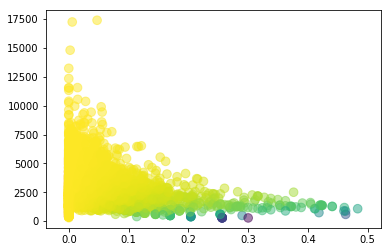

In [23]:
Y = df4['ave_M']
X = df4['total_discount_percentage']
T = np.arctan2(Y,X) # for color value
plt.scatter(X, Y, s=75,c=T, alpha=.5)

plt.show()



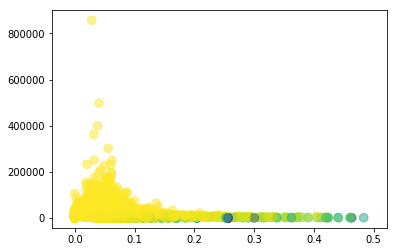

In [24]:
Y = df4['total_M']
X = df4['total_discount_percentage']
T = np.arctan2(Y,X) # for color value
plt.scatter(X, Y, s=75,c=T, alpha=.5)
plt.show()

In [25]:
np.nanpercentile(df4['total_discount_percentage'], 89)

0.10469497031575628

In [26]:
df_normal = df4[df4['total_discount_percentage'] < 0.1]
df_price_sensitive = df4[df4['total_discount_percentage'] >= 0.1]

In [27]:
df_normal.shape[0], df_price_sensitive.shape[0]

(4415, 597)

In [28]:
find_important_difference(df_normal, df_price_sensitive)

ave_M 816.6948
ave_M_not_offline_return 856.929
total_M 8239.6906
total_F 1.44
actually_using_percentage 0.0181
view_per_date 0.6711
view_per_session 0.3149
session_per_date 0.0391
off_view_c 0.0037 Not so significant
total_view_c 0.0017
view_time_med -1.1102 Not so significant
total_discount_percentage -0.1405
online_ratio 0.0469
total_day_using_percentage 0.0198


# 想看一下price_sensitive 對各個group的影響

In [29]:
def look_the_effect_of_price_sensitive(df, p = 0.1):
    other_sensitive = df[df['total_discount_percentage'] >=p]
    other_normal = df[df['total_discount_percentage'] < p]
    print( find_important_difference(other_sensitive, other_normal) )

In [30]:
look_the_effect_of_price_sensitive(df1)

ave_M -1057.2691
ave_M_not_offline_return -1214.465
total_M -4597.9661
total_F -0.4694
actually_using_percentage -0.0181
session_per_date 0.0371
total_conversion_rate -0.0792
off_cart_c -0.0387
off_view_c -0.009
total_cart_c -0.0387
total_view_c -0.009
viewtime_ave 4.1003
view_time_med 1.6894 Not so significant
total_discount_percentage 0.1576
total_day_using_percentage -0.0069
None


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [31]:
look_the_effect_of_price_sensitive(df3)

ave_M -715.0233
ave_M_not_offline_return -763.8027
total_M -4384.648
total_F -0.6473
view_per_date -0.3837 Not so significant
view_per_session -0.2627
total_conversion_rate -0.0081 Not so significant
total_fav_c 0.0167 Not so significant
total_view_c -0.0009
total_discount_percentage 0.143
online_ratio -0.0382
None


In [32]:
look_the_effect_of_price_sensitive(df4)

ave_M -816.6948
ave_M_not_offline_return -856.929
total_M -8239.6906
total_F -1.44
actually_using_percentage -0.0181
view_per_date -0.6711
view_per_session -0.3149
session_per_date -0.0391
off_view_c -0.0037 Not so significant
total_view_c -0.0017
view_time_med 1.1102 Not so significant
total_discount_percentage 0.1405
online_ratio -0.0469
total_day_using_percentage -0.0198
None


In [33]:
look_the_effect_of_price_sensitive(df5)

ave_M -984.6551
ave_M_not_offline_return -1023.1873
total_M -9524.1659
total_F -1.8262
actually_using_percentage 0.0266
view_per_date -0.6061
view_per_session -0.3276
session_per_date -0.0389
off_cart_c -0.0527 Not so significant
off_fav_c -0.0463 Not so significant
on_view_c 0.0609
total_view_c 0.0636
view_time_med 2.024 Not so significant
total_discount_percentage 0.1386
None


* 價格敏感的衝動購買者

In [34]:
df5[df5['total_discount_percentage'] >= 0.1].shape[0]

590

In [35]:
np.nanpercentile(df5['total_discount_percentage'], 67)

0.047300224350305474

In [36]:
find_important_difference_all(df5[df5['total_discount_percentage'] >= 0.05], df5[df5['total_discount_percentage'] < 0.05])

ave_M -648.5171
ave_M_not_offline_return -646.2232
total_M 2844.3829
total_F 2.1017
actually_using_percentage 0.0503
view_per_date -0.4608
view_per_session -0.3708
session_per_date -0.0004 Not significant
total_conversion_rate 0.057
off_cart_c -0.0137 Not significant
off_fav_c -0.0296 Not so significant
off_view_c -0.0098 Not significant
on_cart_c -0.0013 Not significant
on_fav_c -0.0026 Not significant
on_view_c 0.0633
total_cart_c -0.0249
total_fav_c -0.0146 Not significant
total_view_c 0.0335
viewtime_ave 1.267 Not significant
view_time_med 1.303 Not significant
total_discount_percentage 0.0894
online_ratio -0.1251
total_day_using_percentage 0.0336


* 價格敏感的線下購買者 

In [37]:
np.nanpercentile(df1['total_discount_percentage'], 67)

0.0534515051982953

In [38]:
find_important_difference_all(df1[df1['total_discount_percentage'] >= 0.055], df1[df1['total_discount_percentage'] < 0.055])

ave_M -1234.4676
ave_M_not_offline_return -1383.1553
total_M -1873.8247
total_F 0.3171
actually_using_percentage 0.0104
view_per_date -0.1758
view_per_session -0.2094
session_per_date 0.015
total_conversion_rate -0.0177 Not so significant
off_cart_c -0.0248
off_fav_c -0.0106 Not so significant
off_view_c -0.0017 Not significant
on_cart_c 0 Not significant
on_fav_c 0 Not significant
on_view_c 0 Not significant
total_cart_c -0.0248
total_fav_c -0.0106 Not so significant
total_view_c -0.0017 Not significant
viewtime_ave 2.4002
view_time_med 1.2529 Not so significant
total_discount_percentage 0.1005
online_ratio 0.0 Not significant
total_day_using_percentage 0.0004 Not significant


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


# 以上評論
## 對於衝動購物者而言，如果他們還是價格敏感者，那會更提高online_view_conversion_rate，但是他們會比較多在線下買(可能因為折扣多)並且大多不是買線上看到的(可能因為專買線下特價商品)，但線上的轉換率會比較高!!!

## 線下的價格敏感者，則轉換率比一般線下購滿者低

In [39]:
'統整一下，目前有1. 不活躍(可能是線上或線下), 2. 線下購買者, 3. 深思猶豫者, 4. 線上一般購買者, 5.衝動型購物者'

'統整一下，目前有1. 不活躍(可能是線上或線下), 2. 線下購買者, 3. 深思猶豫者, 4. 線上一般購買者, 5.衝動型購物者'

In [40]:
'不活躍',df_inactive.shape[0]

('不活躍', 25676)

In [41]:
'線下購買者', df1.shape[0]

('線下購買者', 21087)

In [42]:
'深思猶豫者', df3.shape[0]

('深思猶豫者', 5012)

In [43]:
'線上一般購買者', df4.shape[0]

('線上一般購買者', 5012)

In [44]:
'衝動型購物者', df5.shape[0]

('衝動型購物者', 5162)

In [45]:
'被排除的人', null_df2.shape[0]

('被排除的人', 23)

In [46]:
'還沒被分群的人(他們沒購買過)', df_never_buy.shape[0]

('還沒被分群的人(他們沒購買過)', 14429)

# 現在要給他們建造馬可夫遷移矩陣

In [47]:
np.nanpercentile( df['ave_M'], 50), np.nanpercentile( df['total_F'], 50)

(2280.0, 1.0)

In [48]:
df[df['ave_M']<=2280].shape[0], df[df['total_F']<=1].shape[0]

(24456, 48450)

In [49]:
df[df['ave_M']>2280].shape[0], df[df['total_F']>1].shape[0]

(24347, 27951)

In [50]:
df5.columns[0], df5.columns[19], df5.columns[33], df5.columns[47], df5.columns[60]

('memberid', '201803F', '201803M', '201803S', '201904S')

In [51]:
'我要看一下，一個月多少session是過少'

'我要看一下，一個月多少session是過少'

In [52]:
counter = 0
total_session = []
for col_name in df.columns[47:61]:
    with_session_df = df[df[col_name]>0]
    print( np.median(with_session_df[col_name]) )
    total_session+= with_session_df[col_name].tolist()
    counter += with_session_df.shape[0]

7.0
11.0
12.0
10.0
17.0
10.0
9.0
11.0
17.0
12.0
19.0
10.0
10.0
10.0


In [53]:
np.nanpercentile(total_session, 49), np.nanpercentile(total_session, 50)

(11.0, 12.0)

## 開始依照過去歷史給予分類
0是沒操作，1是有操作但少於12(但是沒購買)，2是有操作但高於12(但是沒購買)。3,4,5,6分別是FM四象限(F橫M縱)，3是高F高M，4是低F高M

In [54]:
a_dict_for_markov = dict() # 'id: [] shape of 1*14'

In [55]:
for i in range(df5.shape[0]):
    memberID = str( df5.iloc[i,0] )
    a_dict_for_markov[memberID] = [0]*14
    for j in range(14): 
        '''
        47+j, j = 0,1,...13 是session
        33+j 是 M
        19+J 是 F
        '''
        S = df5.iloc[i,47+j]
        M =  df5.iloc[i,33+j]
        F =  df5.iloc[i,19+j]
        M_ave = M/F
        if  S == 0:
            continue
        elif  F == 0:
            a_dict_for_markov[memberID][j] = 1 if S < 12 else 2
        elif M_ave <= 2280 and F<= 1:
            a_dict_for_markov[memberID][j] = 5
        elif M_ave > 2280 and F<= 1:
            a_dict_for_markov[memberID][j] = 4
        elif M_ave <= 2280 and F > 1:
            a_dict_for_markov[memberID][j] = 6
        elif M_ave > 2280 and F > 1:
            a_dict_for_markov[memberID][j] = 3
        


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


In [56]:
a_dict_for_markov

{'2680057180': [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 5, 6, 2],
 '2680062581': [1, 1, 4, 2, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0],
 '2680090688': [0, 0, 0, 0, 0, 0, 3, 3, 3, 6, 2, 1, 1, 4],
 '2680150989': [5, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 '2680176181': [0, 1, 1, 1, 5, 1, 0, 5, 1, 2, 1, 0, 2, 0],
 '2680250588': [4, 2, 4, 2, 4, 1, 4, 1, 1, 2, 1, 1, 1, 2],
 '2680266881': [1, 4, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2680274480': [1, 1, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2680278781': [4, 1, 2, 2, 2, 2, 3, 4, 2, 1, 0, 3, 2, 4],
 '2680292480': [2, 0, 1, 4, 4, 1, 1, 2, 3, 4, 3, 3, 4, 1],
 '2680293382': [0, 0, 1, 1, 0, 0, 4, 2, 1, 2, 2, 2, 4, 1],
 '2680310384': [1, 0, 1, 0, 5, 2, 0, 1, 2, 0, 1, 0, 0, 0],
 '2680329288': [0, 0, 0, 0, 0, 0, 1, 2, 5, 1, 4, 1, 1, 1],
 '2680366182': [2, 5, 0, 0, 0, 0, 1, 5, 4, 3, 1, 0, 2, 0],
 '2680371189': [0, 0, 0, 0, 5, 1, 2, 0, 5, 1, 2, 1, 0, 0],
 '2680389388': [5, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 4],
 '2680410681': [1, 5, 1, 2, 5, 1, 1, 1, 0, 1, 2, 1, 1, 1

In [57]:
a_dict_for_markov['2680422783']

[2, 1, 1, 1, 2, 3, 2, 2, 1, 1, 2, 2, 2, 1]

# 以下是 compute_proportion.ipynb加上來的部分

In [58]:
#測試假設一個group有以下三人，丟入此三人的個月份的分群
a_list_of_group_buyer_route = [a_dict_for_markov['2680250588'],a_dict_for_markov['2680266881'],a_dict_for_markov['2680633189']]

In [59]:
#取得路徑名稱
def pathname(from_,to):
    return "{}".format(from_) + " to " "{}".format(to)

In [60]:
#丟入a_list_of_group_buyer_route 
#ex:丟入a_list_of_group_buyer_route = [[5,6,4,3,2,1,1,1,1,1,1,1,1,1],
# [4,3,2,5,1,1,1,1,1,1,1,1,1,1],
# [1,1,2,3,4,5,6,1,1,1,1,1,1,1],
# [1,1,2,2,2,2,2,1,1,1,1,1,1,1],
# [1,1,1,1,2,2,2,3,3,4,4,5,6,6],
# [1,1,1,1,1,1,1,1,5,1,1,1,1,1]]


def compute_path_count(a_list_of_group_buyer_route):
    #儲存所有路徑的dict, ex: 1->6,2->6 等等 
    path_dict = {}

    #需先儲存此人上一個的群
    last_classification = 0

    #iterate through every list in the group
    for i in a_list_of_group_buyer_route:
        #iterate every classification in each member in the group
        first = True
        for j in i:     
            #如果是第一月，沒有路徑，直接跳到下一個月份
            if(first):
                last_classification = j
                first = False
                continue

            #儲存路徑，ex: {5 to 6 : 1} 代表5到6有一次
            else:
                #把該路徑的count+1
                try:
                    path_dict.update( { pathname(last_classification,j) : path_dict[pathname(last_classification,j)] + 1 } )
                #第一次出現路徑的情況，就設1
                except:
                    path_dict.update( { pathname(last_classification,j) : 1 } )
                last_classification = j
    return path_dict

In [61]:
path_dict = compute_path_count(a_list_of_group_buyer_route)

In [62]:
path_dict

{'4 to 2': 2,
 '2 to 4': 2,
 '4 to 1': 2,
 '1 to 4': 2,
 '1 to 1': 3,
 '1 to 2': 2,
 '2 to 1': 2,
 '4 to 5': 1,
 '5 to 2': 1,
 '2 to 0': 2,
 '0 to 0': 11,
 '0 to 2': 2,
 '1 to 0': 2,
 '0 to 5': 1,
 '5 to 0': 1,
 '0 to 1': 1,
 '0 to 4': 1,
 '4 to 0': 1}

In [63]:
def compute_path_proportion(path_dict):
    #先計算所有路徑的次數 total_count
    total_count = 0
    for values in path_dict.values():
        total_count += values
    #開始把所有路徑轉為proportion

    path_divided_by_all_proportion = {}
    for key, value in path_dict.items():
        path_divided_by_all_proportion.update({key : (value/total_count)})

    #一組group的route機率 divided by classification
    path_divided_by_classification_proportion = {}
    #from_count 記錄從某一個classification分出去的總數  Ex : 5 to 1為2 ,5 to 6為 3  則from count有{ 5 : 2+3}
    from_count = {}

    for key, value in path_dict.items():
        try:
            from_count.update({str.split(key)[0] : from_count[str.split(key)[0]]+value})
        except: #處理第一次dict沒key的情況
            from_count.update({str.split(key)[0] : value})
    for key, value in path_dict.items():
        for from_key, from_count_value in from_count.items():
            if(str.split(key)[0]==from_key):
                path_divided_by_classification_proportion.update({key : (value/from_count_value)})

    return path_divided_by_all_proportion,path_divided_by_classification_proportion

In [64]:
compute_path_proportion(path_dict)[0] #此為divided by all 的比率 即 各分群到令一分群count/所有路徑的count

{'4 to 2': 0.05128205128205128,
 '2 to 4': 0.05128205128205128,
 '4 to 1': 0.05128205128205128,
 '1 to 4': 0.05128205128205128,
 '1 to 1': 0.07692307692307693,
 '1 to 2': 0.05128205128205128,
 '2 to 1': 0.05128205128205128,
 '4 to 5': 0.02564102564102564,
 '5 to 2': 0.02564102564102564,
 '2 to 0': 0.05128205128205128,
 '0 to 0': 0.28205128205128205,
 '0 to 2': 0.05128205128205128,
 '1 to 0': 0.05128205128205128,
 '0 to 5': 0.02564102564102564,
 '5 to 0': 0.02564102564102564,
 '0 to 1': 0.02564102564102564,
 '0 to 4': 0.02564102564102564,
 '4 to 0': 0.02564102564102564}

In [65]:
compute_path_proportion(path_dict)[1] #此為 divided by classification的比率 即 假設4 to 2有3次,
# 4 to 5有5次 則4 to 2的比率為 3/(3+5) = 3/8 而不考慮其他 比如說1 to 3, 1 to 5之類的次數

{'4 to 2': 0.3333333333333333,
 '2 to 4': 0.3333333333333333,
 '4 to 1': 0.3333333333333333,
 '1 to 4': 0.2222222222222222,
 '1 to 1': 0.3333333333333333,
 '1 to 2': 0.2222222222222222,
 '2 to 1': 0.3333333333333333,
 '4 to 5': 0.16666666666666666,
 '5 to 2': 0.5,
 '2 to 0': 0.3333333333333333,
 '0 to 0': 0.6875,
 '0 to 2': 0.125,
 '1 to 0': 0.2222222222222222,
 '0 to 5': 0.0625,
 '5 to 0': 0.5,
 '0 to 1': 0.0625,
 '0 to 4': 0.0625,
 '4 to 0': 0.16666666666666666}